<div style="padding:25px; border-radius:15px; font-family:Arial, sans-serif; border:1px solid #ccc;">

<h1 style="text-align:center; margin-bottom:10px;">Atliq Hotels Data Analysis Project</h1>

<p style="font-size:16px; margin:5px 0;"><strong>Author:</strong> Abhinay Angadi</p>
<p style="font-size:16px; margin:5px 0;"><strong>Date:</strong> November 2025</p>
<p style="font-size:16px; margin:5px 0;"><strong>Tools Used:</strong> Python | Pandas | Matplotlib | Seaborn | Plotly</p>

</div>


<div style="padding:20px; border-radius:10px; border:1px solid #ccc; font-family:Arial, sans-serif;">

<h2 style="color:#2F4F4F;"> Introduction</h2>
<p>AtliQ Hotels aims to understand the booking and revenue trends across its properties using data-driven insights.  
This project performs a comprehensive data analysis on hotel bookings data to uncover patterns in occupancy, revenue, and booking behavior across different regions and platforms.</p>

<h2 style="color:#2F4F4F;">Objective</h2>
<ul>
    <li>Analyze key performance metrics like revenue, occupancy rate, and booking patterns.</li>
    <li>Compare hotel performance across cities and room categories.</li>
    <li>Identify potential business insights to improve operational efficiency.</li>
</ul>

</div>


<div style="padding:20px; border-radius:10px; border:1px solid #ccc; font-family:Arial, sans-serif;">

<h2 style="color:#2F4F4F;">Datasets Overview</h2>
<p>We’ll be working with five CSV datasets:</p>
<ul>
    <li><strong>dim_date.csv</strong> — contains date-level details for time-based analysis.</li>
    <li><strong>dim_hotels.csv</strong> — hotel master data with metadata.</li>
    <li><strong>dim_rooms.csv</strong> — room information and categories.</li>
    <li><strong>fact_aggregated_bookings.csv</strong> — summarized booking data.</li>
    <li><strong>fact_bookings.csv</strong> — detailed transaction-level booking records.</li>
</ul>

</div>


<div style="padding:20px; border-radius:10px; border:1px solid #ccc; font-family:Arial, sans-serif;">

<h2 style="color:#2F4F4F;">1. Data Import and Data Exploration</h2>
<p>In this section, we will:</p>
<ul>
    <li>Import all necessary CSV datasets using <code>pandas</code>.</li>
    <li>Perform initial data inspection to understand the structure, columns, and sample records.</li>
    <li>Check for missing values, duplicates, and basic data quality issues.</li>
</ul>

</div>


In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Read bookings data in a dataframe**

In [244]:
df_bookings = pd.read_csv('datasets/fact_bookings.csv')
df_bookings.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


**Exploring bookings dataframe using EDA**

In [245]:
df_bookings.shape

(134590, 12)

In [246]:
df_bookings['room_category'].unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [247]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [248]:
df_bookings['booking_platform'].value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

In [249]:
df_bookings.ratings_given.unique()

array([ 1., nan,  5.,  4.,  3.,  2.])

In [250]:
df_bookings.ratings_given.value_counts()

ratings_given
5.0    19480
3.0    17561
4.0     9653
2.0     6452
1.0     3537
Name: count, dtype: int64

In [251]:
df_bookings.booking_status.unique()

array(['Checked Out', 'Cancelled', 'No Show'], dtype=object)

In [252]:
df_bookings.booking_status.value_counts()

booking_status
Checked Out    94411
Cancelled      33420
No Show         6759
Name: count, dtype: int64

In [253]:
df_bookings.no_guests.value_counts()

no_guests
 2.0     60219
 1.0     44311
 3.0     15119
 4.0     12094
 6.0      1444
 5.0      1391
-4.0         2
-3.0         1
-2.0         1
-10.0        1
-12.0        1
-6.0         1
-17.0        1
-1.0         1
Name: count, dtype: int64

<Axes: xlabel='ratings_given'>

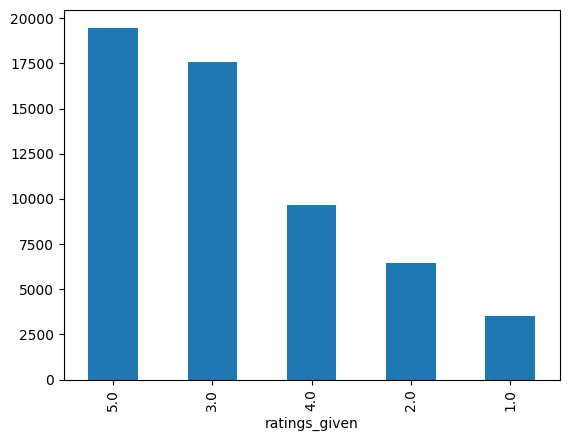

In [254]:
df_bookings.ratings_given.value_counts().plot(kind='bar')

In [255]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


**Exploring remaining datasets**

In [256]:
df_date = pd.read_csv('datasets/dim_date.csv')
df_hotels = pd.read_csv('datasets/dim_hotels.csv')
df_rooms = pd.read_csv('datasets/dim_rooms.csv')
df_agg_bookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')

**Exploring hotels dataframe**

In [257]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [258]:
df_hotels.shape

(25, 4)

In [259]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [260]:
df_hotels.property_name.value_counts()

property_name
Atliq Grands     4
Atliq Exotica    4
Atliq City       4
Atliq Blu        4
Atliq Bay        4
Atliq Palace     4
Atliq Seasons    1
Name: count, dtype: int64

<Axes: xlabel='city'>

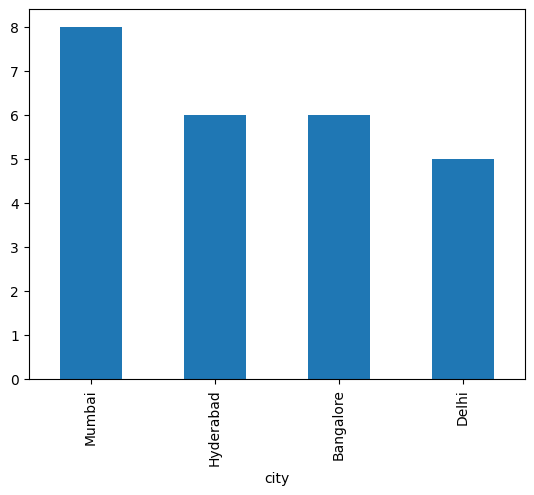

In [261]:
df_hotels.city.value_counts().plot(kind="bar")

**Exploring aggregate bookings dataframe**

In [262]:
df_agg_bookings.shape

(9200, 5)

In [263]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


<Axes: xlabel='room_category'>

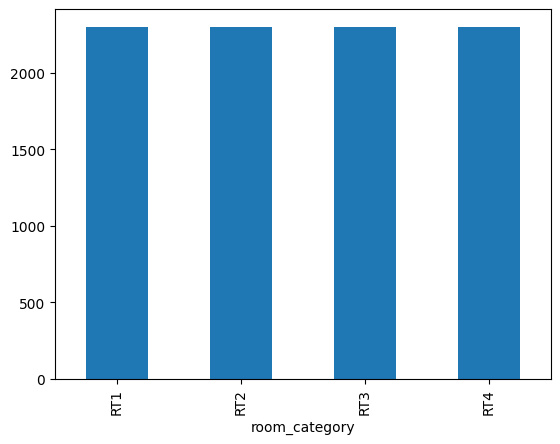

In [264]:
df_agg_bookings.room_category.value_counts().plot(kind='bar')

In [265]:
df_agg_bookings.successful_bookings.unique()

array([ 25,  28,  23,  30,  18,  22,  24,  16,  20, 100,  26,  12,  21,
        11,  29,  31,  34,   9,  32,  38,  37,  35,  33,  40,  19,  36,
        27,  15,  17,   8,  13,  14,   2,   4,   5,   6,  10,   3,   7,
         1,  39,  50,  43,  41, 123])

**Exercise-1. Find out unique property ids in aggregate bookings dataset**

In [266]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

**Exercise-2. Find out total bookings per property_id**

In [267]:
df_agg_bookings.groupby('property_id')['successful_bookings'].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

**Exercise-3. Find out days on which bookings are greater than capacity**

In [268]:
sol_3 = df_agg_bookings[df_agg_bookings['successful_bookings']>df_agg_bookings['capacity']]
sol_3

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [269]:
sol_3['check_in_date'].values

array(['1-May-22', '1-May-22', '11-Jun-22', '2-Jul-22', '25-Jul-22',
       '31-Jul-22'], dtype=object)

**Exercise-4. Find out properties that have highest capacity**

In [270]:
df_agg_bookings.capacity.max()

np.float64(50.0)

In [271]:
df_agg_bookings[df_agg_bookings['capacity']==df_agg_bookings['capacity'].max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


<div style="padding:20px; border-radius:10px; border:1px solid #ccc; font-family:Arial, sans-serif;">

<h2 style="color:#2F4F4F;">2. Data Cleaning</h2>
<p>Data cleaning is a crucial step to ensure accuracy and consistency in our analysis. In this section, we will:</p>

<ul>
    <li>Handle missing values and decide appropriate imputation or removal strategies.</li>
    <li>Identify and remove duplicate records to avoid biased results.</li>
    <li>Correct inconsistent data formats (e.g., dates, categorical variables).</li>
    <li>Detect and handle outliers that could skew analysis.</li>
    <li>Standardize column names and data types for consistency.</li>
</ul>

<p><em>Cleaning the data properly ensures that all subsequent analysis and visualizations are reliable and insightful.</em></p>

</div>


**lets understand the facts_booking dataframe and will do the some cleaning**

In [272]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


<div style="padding:20px; border-radius:10px; border:1px solid #ccc; font-family:Arial, sans-serif;">

<h2 style="color:#2F4F4F;">Column-wise Analysis</h2>

<h3 style="color:#4B0082;">property_id</h3>
<ul>
    <li>IDs range from <strong>16,558 to 19,563</strong>.</li>
    <li>Mean ≈ 18,061, std ≈ 1,093 → IDs are mostly sequential with some gaps.</li>
</ul>

<h3 style="color:#4B0082;"> no_guests</h3>
<ul>
    <li>Mean ≈ 2.04, std ≈ 1.03.</li>
    <li>Minimum = -17 → invalid value, indicates data quality issues / outliers.</li>
    <li>Most bookings involve 1–2 guests (25% = 1, 50% = 2, 75% = 2).</li>
</ul>

<h3 style="color:#4B0082;"> ratings_given</h3>
<ul>
    <li>Mean ≈ 3.62, std ≈ 1.23.</li>
    <li>Min = 1, max = 5 → likely a 1–5 rating system.</li>
    <li>Only 56,683 non-null values → many missing ratings (~57% missing).</li>
</ul>

<h3 style="color:#4B0082;"> revenue_generated</h3>
<ul>
    <li>Mean ≈ 15,378, std ≈ 93,036 → very high variance due to extreme values / outliers.</li>
    <li>Max ≈ 28.56 million, min ≈ 6,500 → huge range.</li>
    <li>Median ≈ 13,500 → most bookings are moderate, but mean skewed by few large transactions.</li>
</ul>

<h3 style="color:#4B0082;"> revenue_realized</h3>
<ul>
    <li>Mean ≈ 12,696, std ≈ 6,928.</li>
    <li>Min = 2,600, max = 45,220 → more reasonable spread than <code>revenue_generated</code>.</li>
    <li>Indicates actual revenue collected is generally lower than total generated.</li>
</ul>

</div>


<div style="padding:20px; border-radius:10px; border:1px solid #ccc; font-family:Arial, sans-serif;">

<h2 style="color:#2F4F4F;"> Key Observations</h2>

<ul>
    <li> <strong>Invalid values / outliers:</strong> <code>no_guests</code> has negative values; <code>revenue_generated</code> contains extremely high values.</li>
    <li> <strong>Missing data:</strong> <code>ratings_given</code> has significant missing values (~57%).</li>
    <li> <strong>Skewed distributions:</strong> <code>revenue_generated</code> is heavily skewed due to a few very large transactions.</li>
    <li> <strong>Most bookings:</strong> involve 1–2 guests with moderate revenue.</li>
    <li> <strong>Revenue gap:</strong> <code>revenue_realized</code> is generally lower than <code>revenue_generated</code>, suggesting possible cancellations, discounts, or partial payments.</li>
</ul>

</div>


**1] Cleaning invalid guests**

In [273]:
df_bookings.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100


In [274]:
df_bookings[df_bookings['no_guests']<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


As you can see above, number of guests having less than zero value represents data error. We can ignore these records.

In [275]:
df_bookings = df_bookings[df_bookings['no_guests']>0]

In [276]:
df_bookings.shape

(134578, 12)

As you can see above, ratings column has NAN values, so its upto user to give rating or not, so We will not clean this column data

**2] Outlier removal in revenue generated column**

In [277]:
df_bookings.revenue_generated.value_counts()

revenue_generated
15300       13652
13500        9243
9000         9151
11050        8769
6500         7702
            ...  
9100000         1
2000000         1
12600000        1
28560000        1
10000000        1
Name: count, Length: 67, dtype: int64

In [278]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

In [279]:
df_bookings[df_bookings['revenue_generated']<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


As we see there are no records that are less than 0. So we will use general outlier removal technique to remove the ouliers from the revenue generated column

<div style="padding:20px; border-radius:10px; border:1px solid #ccc; font-family:Arial, sans-serif;">

<h2 style="color:#2F4F4F;"> Ways to Remove Outliers</h2>

<p>When dealing with numeric data like <code>revenue_generated</code>, extreme values can skew analysis. Here are common approaches to handle outliers:</p>

<ul>
    <li> <strong>Interquartile Range (IQR) Method:</strong> Remove values below Q1 - 1.5×IQR or above Q3 + 1.5×IQR. Good for skewed distributions.</li>
    <li> <strong>Z-score / Standard Deviation Method:</strong> Remove values more than 3 standard deviations from the mean. Works for normal distributions.</li>
    <li> <strong>Percentile / Quantile Threshold:</strong> Remove values outside 1st–99th percentile range. Simple, avoids extreme tails.</li>
    <li> <strong>Domain-specific Threshold:</strong> Use business knowledge to set max/min thresholds. Example: revenue > 500,000 is unrealistic.</li>
    <li> <strong>Log Transformation:</strong> Apply log or log1p to reduce skewness. Keeps all data but reduces extreme impact.</li>
    </li>
</ul>

<p><em> Tip:</em> Choose the method depending on data distribution, business context, and analysis goals.</p>

</div>


<div style="padding:20px; border-radius:10px; border:1px solid #ccc; font-family:Arial, sans-serif;">

<h2 style="color:#2F4F4F;">Why Remove Outliers Using Standard Deviation (Z-score)</h2>

<p>Outliers are extreme values that can distort statistical analysis and visualizations. In our dataset, the <code>revenue_generated</code> column has some extremely high values (e.g., 28,560,000) compared to the majority of transactions. Removing these outliers ensures that our analysis accurately reflects typical bookings and revenue trends.</p>

<h3 style="color:#4B0082;">Method: Z-score / Standard Deviation</h3>
<p>The Z-score method identifies outliers based on how many standard deviations a value is away from the mean. It is calculated as:</p>

<div style="text-align:center; font-size:16px; margin:10px 0;">
<b>Z = (X - μ) / σ</b>
</div>

<ul>
    <li><code>X</code> = value in the column</li>
    <li><code>μ</code> = mean of the column</li>
    <li><code>σ</code> = standard deviation of the column</li>
</ul>

<p>Any data point with |Z| > 3 is considered an outlier (more than 3 standard deviations away from the mean).</p>

</div>


In [280]:
df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()

(np.float64(15378.036937686695), np.float64(93040.1549314641))

In [281]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()
avg, std

(np.float64(15378.036937686695), np.float64(93040.1549314641))

In [282]:
upper_limit = avg+3*std
upper_limit

np.float64(294498.50173207896)

In [283]:
lower_limit = avg-3*std
lower_limit

np.float64(-263742.4278567056)

now we will get the records which are above the upper_limit and lower limit

In [284]:
df_bookings[df_bookings['revenue_generated']<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [285]:
df_bookings[df_bookings['revenue_generated']>upper_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


So, we will ignore those records as they are the potential outliers

In [286]:
df_bookings = df_bookings[df_bookings['revenue_generated']<=upper_limit]
df_bookings.shape

(134573, 12)

now after dropping those records lets see the booings dataframe whether they have proper revenue generated values

In [287]:
df_bookings.revenue_generated.describe()

count    134573.000000
mean      14915.959776
std        6452.676164
min        6500.000000
25%        9900.000000
50%       13500.000000
75%       18000.000000
max       45220.000000
Name: revenue_generated, dtype: float64

In [288]:
upper_limit = df_bookings.revenue_generated.mean() + 3*df_bookings.revenue_generated.std()
upper_limit

np.float64(34273.98826948176)

In [289]:
df_bookings[df_bookings['revenue_generated']>upper_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
153,May012216559RT417,16559,30-04-22,1/5/2022,2/5/2022,4.0,RT4,others,NaN,Cancelled,38760,15504
...,...,...,...,...,...,...,...,...,...,...,...,...
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134469,Jul312219562RT47,19562,10/7/2022,31-07-22,6/8/2022,5.0,RT4,makeyourtrip,NaN,Cancelled,37050,14820
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


One observation we can have in above dataframe is that all rooms are RT4 which means presidential suit. Now since RT4 is a luxurious room it is likely their rent will be higher. To make a fair analysis, we need to do data analysis only on RT4 room types

In [290]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [291]:
23439+3*9048

50583

Here higher limit comes to be 50583 and in our dataframe above we can see that max value for revenue realized is 45220. Hence we can conclude that there is no outlier and we don't need to do any data cleaning on this particular column

In [292]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

Total values in our dataframe is 134576. Out of that 77899 rows has null rating. Since there are many rows with null rating, we should not filter these values. Also we should not replace this rating with a median or mean rating etc

**Exercise-1. In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate subtitute (possible ways is to use mean or median)**

In [293]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [294]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [295]:
df_agg_bookings[df_agg_bookings['capacity'].isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [296]:
median = df_agg_bookings['capacity'].median()
median

np.float64(25.0)

In [297]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace=True)

C:\Users\Abhinay A\AppData\Local\Temp\ipykernel_23080\625765049.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace=True)


In [298]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

**Exercise-2. In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records**

In [299]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [300]:
df_agg_bookings[df_agg_bookings.successful_bookings<df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


<div style="padding:20px; border-radius:10px; border:1px solid #ccc; font-family:Arial, sans-serif;">

<h2 style="color:#2F4F4F;"> 3. Data Transformation</h2>

<p>After cleaning the dataset, the next step is to <b>transform</b> the data into a suitable format for analysis. This process involves restructuring, encoding, and aggregating data to make it more consistent and analytical-ready.</p>

<h3 style="color:#4B0082;"> Key Transformations Applied</h3>

<ul>
  <li><b>Data Type Conversion:</b> Ensuring date columns are in <code>datetime</code> format and numerical fields are properly typed.</li>
  <li><b>Feature Engineering:</b> Creating new variables such as <code>occupancy_rate</code>, <code>revenue_per_guest</code>, and <code>booking_gap_days</code>.</li>
  <li><b>Merging Datasets:</b> Combining dimension and fact tables (<code>dim_hotels</code>, <code>fact_bookings</code>, etc.) to enable richer analysis.</li>
  <li><b>Encoding:</b> Converting categorical fields (like city or room type) into numerical or dummy variables where needed.</li>
  <li><b>Aggregation:</b> Grouping data by city, room category, and booking channel for KPI generation.</li>
</ul>

<p>These transformations help prepare the data for further steps like <b>exploratory data analysis (EDA)</b> and <b>visualization</b>, ensuring consistent and meaningful insights.</p>

</div>


In [301]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


we need a column called occupancy percentage, from this we can get to know the percentage occupancy of the bookings

In [302]:
25/30

0.8333333333333334

In [303]:
df_agg_bookings['occu_per'] = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis = 1)

In [304]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occu_per
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947
4,16558,1-May-22,RT1,18,19.0,0.947368


In [305]:
new_col = df_agg_bookings.apply(lambda x: x['successful_bookings']/x['capacity'],axis=1)
df_agg_bookings = df_agg_bookings.assign(occu_per=new_col.values)
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occu_per
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667


Now we will convert occu_per column value into percentage value

In [306]:
df_agg_bookings['occu_per'] = df_agg_bookings['occu_per'].apply(lambda x: round(x*100),2)
df_agg_bookings.head(3)

C:\Users\Abhinay A\AppData\Local\Temp\ipykernel_23080\3779080247.py:1: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  df_agg_bookings['occu_per'] = df_agg_bookings['occu_per'].apply(lambda x: round(x*100),2)


,property_id,check_in_date,room_category,successful_bookings,capacity,occu_per
0,16559,1-May-22,RT1,25,30.0,83
1,19562,1-May-22,RT1,28,30.0,93
2,19563,1-May-22,RT1,23,30.0,77


In [307]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9200 non-null   float64
 5   occu_per             9200 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 431.4+ KB


There are various types of data transformations that you may have to perform based on the need. Few examples of data transformations are,

1. Creating new columns
2. Normalization
3. Merging data
4. Aggregation

<div style="padding:20px; border-radius:10px; border:1px solid #ccc; font-family:Arial, sans-serif;">

<h2 style="color:#2F4F4F;"> 4. Insights Generation</h2>

<p>Once the data is cleaned and transformed, the next step is to <b>derive meaningful business insights</b> from it. 
This stage focuses on uncovering trends, relationships, and key performance patterns that can guide strategic decision-making for <b>AtliQ Hotels</b>.</p>

<h3 style="color:#4B0082;">Key Areas of Insight</h3>

<ul>
  <li><b>Occupancy Trends:</b> Analyze how room occupancy changes across time, cities, and property types.</li>
  <li><b>Revenue Analysis:</b> Identify top-performing hotels, cities, and seasons generating the highest revenue.</li>
  <li><b>Customer Behavior:</b> Study booking preferences such as guest count, stay duration, and platform used.</li>
  <li><b>Performance Comparison:</b> Compare <code>revenue_generated</code> vs <code>revenue_realized</code> to identify potential revenue leakages or cancellations.</li>
  <li><b>KPI Correlations:</b> Understand relationships between metrics like <code>occupancy_percentage</code>, <code>ratings_given</code>, and <code>revenue_realized</code>.</li>
</ul>

<p>These insights form the foundation for <b>data-driven recommendations</b> aimed at improving occupancy rates, optimizing pricing strategies, and enhancing overall guest satisfaction.</p>

</div>


**1. What is an average occupancy rate in each of the room categories?**

In [308]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occu_per
0,16559,1-May-22,RT1,25,30.0,83
1,19562,1-May-22,RT1,28,30.0,93
2,19563,1-May-22,RT1,23,30.0,77
3,17558,1-May-22,RT1,30,19.0,158
4,16558,1-May-22,RT1,18,19.0,95


In [309]:
df_agg_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [310]:
df_agg_bookings.groupby('room_category')['occu_per'].mean()

room_category
RT1    58.245652
RT2    58.044783
RT3    58.011304
RT4    59.302174
Name: occu_per, dtype: float64

I don't understand RT1, RT2 etc. Print room categories such as Standard, Premium, Elite etc along with average occupancy percentage

In [311]:
df_rooms.head(3)

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium


In [312]:
df = pd.merge(df_agg_bookings, df_rooms, left_on='room_category', right_on='room_id')
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occu_per,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,77,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,158,RT1,Standard
4,16558,1-May-22,RT1,18,19.0,95,RT1,Standard
...,...,...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72,RT4,Presidential
9196,16559,31-Jul-22,RT4,13,18.0,72,RT4,Presidential
9197,17558,31-Jul-22,RT4,3,6.0,50,RT4,Presidential
9198,19563,31-Jul-22,RT4,3,6.0,50,RT4,Presidential


In [313]:
df.drop('room_id',axis=1,inplace=True)
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occu_per,room_class
0,16559,1-May-22,RT1,25,30.0,83,Standard
1,19562,1-May-22,RT1,28,30.0,93,Standard
2,19563,1-May-22,RT1,23,30.0,77,Standard
3,17558,1-May-22,RT1,30,19.0,158,Standard
4,16558,1-May-22,RT1,18,19.0,95,Standard
...,...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72,Presidential
9196,16559,31-Jul-22,RT4,13,18.0,72,Presidential
9197,17558,31-Jul-22,RT4,3,6.0,50,Presidential
9198,19563,31-Jul-22,RT4,3,6.0,50,Presidential


In [314]:
df.groupby('room_class')['occu_per'].mean()

room_class
Elite           58.044783
Premium         58.011304
Presidential    59.302174
Standard        58.245652
Name: occu_per, dtype: float64

**2. Print average occupancy rate per city**

In [315]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


df dataframe and df_hotels have the same column called property_id. so will merge it on that column

In [316]:
df = pd.merge(df, df_hotels, on = 'property_id')
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occu_per,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,77,Standard,Atliq Palace,Business,Bangalore
3,17558,1-May-22,RT1,30,19.0,158,Standard,Atliq Grands,Luxury,Mumbai
4,16558,1-May-22,RT1,18,19.0,95,Standard,Atliq Grands,Luxury,Delhi


In [317]:
df.groupby('city')['occu_per'].mean()

city
Bangalore    56.594656
Delhi        61.624457
Hyderabad    58.147192
Mumbai       57.931386
Name: occu_per, dtype: float64

In [318]:
df[df['city']=='Delhi']['occu_per'].mean()

np.float64(61.62445652173913)

**3. When was the occupancy better? Weekday or Weekend?**

In [319]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [320]:
df = pd.merge(df, df_date, left_on='check_in_date',right_on='date')
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occu_per,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,52,Premium,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63,Standard,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53,Standard,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
4,17558,10-May-22,RT1,11,19.0,58,Standard,Atliq Grands,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday


In [321]:
df.groupby('day_type')['occu_per'].mean()

day_type
weekeday    50.900435
weekend     72.406842
Name: occu_per, dtype: float64

**4: In the month of June, what is the occupancy for different cities**

In [322]:
df.check_in_date.unique()

array(['10-May-22', '11-May-22', '12-May-22', '13-May-22', '14-May-22',
       '15-May-22', '16-May-22', '17-May-22', '18-May-22', '19-May-22',
       '20-May-22', '21-May-22', '22-May-22', '23-May-22', '24-May-22',
       '25-May-22', '26-May-22', '27-May-22', '28-May-22', '29-May-22',
       '30-May-22', '31-May-22', '10-Jun-22', '11-Jun-22', '12-Jun-22',
       '13-Jun-22', '14-Jun-22', '15-Jun-22', '16-Jun-22', '17-Jun-22',
       '18-Jun-22', '19-Jun-22', '20-Jun-22', '21-Jun-22', '22-Jun-22',
       '23-Jun-22', '24-Jun-22', '25-Jun-22', '26-Jun-22', '27-Jun-22',
       '28-Jun-22', '29-Jun-22', '30-Jun-22', '10-Jul-22', '11-Jul-22',
       '12-Jul-22', '13-Jul-22', '14-Jul-22', '15-Jul-22', '16-Jul-22',
       '17-Jul-22', '18-Jul-22', '19-Jul-22', '20-Jul-22', '21-Jul-22',
       '22-Jul-22', '23-Jul-22', '24-Jul-22', '25-Jul-22', '26-Jul-22',
       '27-Jul-22', '28-Jul-22', '29-Jul-22', '30-Jul-22', '31-Jul-22'],
      dtype=object)

In [323]:
df['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [324]:
df_june_22 = df[df['mmm yy']=='Jun 22']
df_june_22.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occu_per,room_class,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,67,Standard,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,19562,10-Jun-22,RT1,19,30.0,63,Standard,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2202,19563,10-Jun-22,RT1,17,30.0,57,Standard,Atliq Palace,Business,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2203,17558,10-Jun-22,RT1,9,19.0,47,Standard,Atliq Grands,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2204,16558,10-Jun-22,RT1,11,19.0,58,Standard,Atliq Grands,Luxury,Delhi,10-Jun-22,Jun 22,W 24,weekeday


In [325]:
df_june_22.groupby('city')['occu_per'].mean().round(2).sort_values(ascending=False)

city
Delhi        62.49
Hyderabad    58.47
Mumbai       58.39
Bangalore    56.58
Name: occu_per, dtype: float64

**5: We got new data for the month of august. Append that to existing data**

In [326]:
df_august = pd.read_csv('datasets/new_data_august.csv')
df_august.head()

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92


In [327]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occu_per', 'room_class', 'property_name', 'category',
       'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [328]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [329]:
new_df = pd.concat([df, df_august],ignore_index=True, axis=0)
new_df.tail()

,property_id,check_in_date,room_category,successful_bookings,capacity,occu_per,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6502,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.67
6503,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
6504,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
6505,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
6506,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


**6. Print revenue realized per city**

In [330]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [331]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [332]:
df_bookings_all = pd.merge(df_bookings, df_hotels, on ='property_id')
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [333]:
df_bookings_all.groupby('city')['revenue_realized'].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

**7. Print month by month revenue**

In [334]:
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [335]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


if we observe in both dataframes booking_date and date columns are of different format. so converting both of them in a single format using datetime method

In [336]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [337]:
df_date['date'] = pd.to_datetime(df_date['date'])
df_date.head()

C:\Users\Abhinay A\AppData\Local\Temp\ipykernel_23080\269778243.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date['date'] = pd.to_datetime(df_date['date'])


,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday


In [338]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [339]:
df_bookings_all['check_in_date'] = pd.to_datetime(df_bookings_all['check_in_date'], dayfirst=True, errors='coerce')
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,2022-05-01,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,2022-05-01,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [340]:
df_bookings_all = pd.merge(df_bookings_all, df_date, left_on="check_in_date", right_on="date")
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
3,May012216558RT17,16558,28-04-22,2022-05-01,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
4,May012216558RT18,16558,26-04-22,2022-05-01,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend


In [341]:
df_bookings_all.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul 22    243180932
Jun 22    229637640
May 22    234353183
Name: revenue_realized, dtype: int64

**Exercise-1. Print revenue realized per hotel type**

In [342]:
df_bookings_all.groupby('property_name')['revenue_realized'].sum().round(2).sort_values()

property_name
Atliq Seasons     26838223
Atliq Grands      87245939
Atliq Bay        107516312
Atliq Blu        108108129
Atliq City       118290783
Atliq Palace     125553143
Atliq Exotica    133619226
Name: revenue_realized, dtype: int64

**Exercise-2 Print average rating per city**

In [343]:
df_bookings_all.ratings_given.unique()

array([nan,  5.,  4.,  3.,  1.,  2.])

In [344]:
df_bookings_all.groupby('city')['ratings_given'].mean()

city
Bangalore    3.414599
Delhi        3.788105
Hyderabad    3.653903
Mumbai       3.655835
Name: ratings_given, dtype: float64

**Exercise-3 Print a pie chart of revenue realized per booking platform**

In [345]:
df_bookings_all.booking_platform.unique()

array(['others', 'direct online', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [346]:
df_bookings_all.booking_platform.value_counts()

booking_platform
others            22897
makeyourtrip      11228
logtrip            6112
direct online      5461
tripster           3923
journey            3339
direct offline     2830
Name: count, dtype: int64

<Axes: ylabel='revenue_realized'>

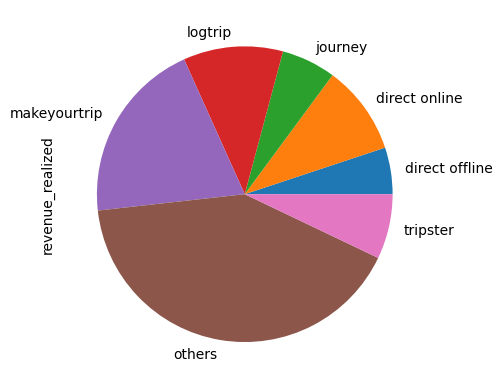

In [347]:
df_bookings_all.groupby('booking_platform')['revenue_realized'].sum().plot(kind='pie')